#Comparison of Sy 1s and Sy 2s

This notebook takes the SED fits for all of the BAT AGN and compares the measured properties between Sy 1s and Sy 2s.

In [1]:
# Standard setup of Python packages
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(context='talk', style='darkgrid', color_codes=True, palette='deep')

In [2]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior.csv', index_col=0)
bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3', 'IC1657', 'IC2461',
                        'MCG-01-05-047', 'NGC788', 'NGC2655',
                        'NGC3718', 'NGC4939', 'NGC4941',
                        'NGC5033', 'NGC4235', 'CenA'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

We need to split the sample up into Sy 1s and Sy 2s. As we done in the past, all sources with Sy 1 - 1.5 will be broadly classified as a Sy 1 and sources with Sy 1.8 - 2.0 will be classified as a Sy 2. The specific classifications are contained in /Users/ttshimiz/Github/bat-data/bat_info.csv.

In [3]:
bat_info = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_info.csv', index_col=0)

broad_type = pd.Series(index=bat_info.index, name='Sy_Type')

for n in bat_info.index.values:

    type_split = bat_info.loc[n, 'Seyfert_Type'].split()

    if (type_split[0] == 'Sy'):
        if ((type_split[1] == '1') | (type_split[1] == '1.2') | (type_split[1] == '1.4') | (type_split[1] == '1.5')):

            broad_type.loc[n] = 'Sy 1'

        elif ((type_split[1] == '1.8') | (type_split[1] == '1.9') | (type_split[1] == '2')):
            broad_type.loc[n] = 'Sy 2'
    else:

        if (type_split[0] == 'LINER'):
            broad_type.loc[n] = 'LINER'

        elif (type_split[0] == 'AGN'):
            broad_type.loc[n] = 'AGN'

In [7]:
bat_casey['Sy_Type'] = broad_type
bat_decompir['Sy_Type'] = broad_type
bat_dale14['Sy_Type'] = broad_type

Let's first look at just the total IR luminosity for Sy 1's and Sy 2's.

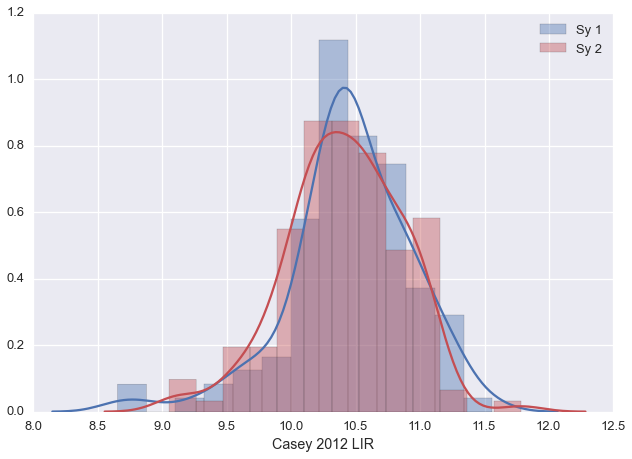

In [10]:
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'lir_total'], color='b')
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'lir_total'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Casey 2012 LIR')

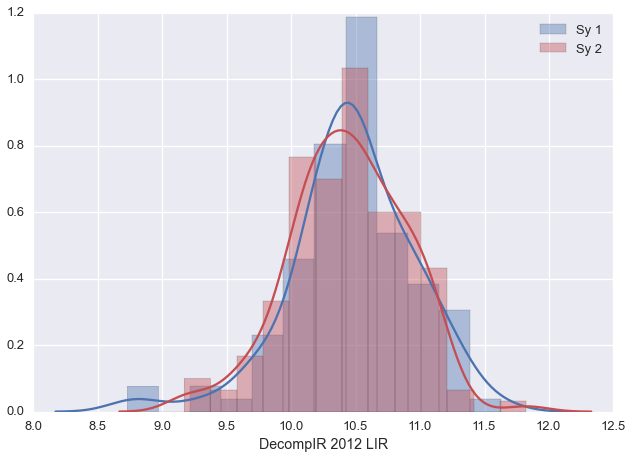

In [12]:
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'lir_total'], color='b')
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'lir_total'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('DecompIR 2012 LIR')

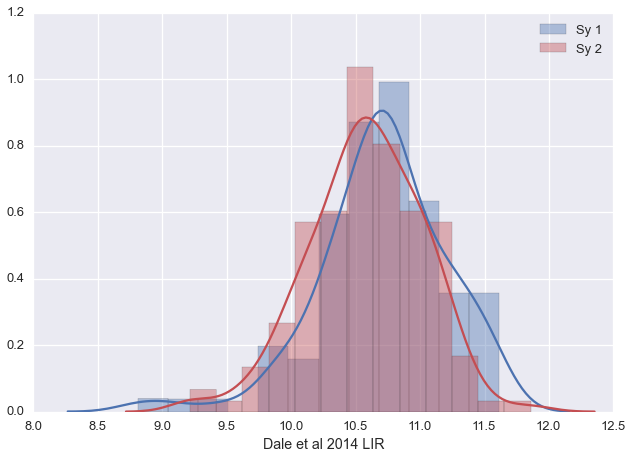

In [14]:
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'lir_total'], color='b')
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'lir_total'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Dale et al 2014 LIR')

So it looks like for both the Casey and DecompIR models, the total IR luminosity is the same for Sy 1s and Sy 2s. The Dale 2014 model is the only one that perhaps shows that Sy 1's have a slightly higher IR luminosity than Sy 2s. Let's run a quick K-S test between Sy 1's and Sy 2's for each model.

In [15]:
from scipy.stats import ks_2samp

In [16]:
ks_sy_lir_total_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'lir_total'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'lir_total'])
ks_sy_lir_total_decompir = ks_2samp(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'lir_total'], bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'lir_total'])
ks_sy_lir_total_dale14 = ks_2samp(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'lir_total'], bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'lir_total'])

print 'Casey LIR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lir_total_casey[1]
print ''
print 'DecompIR LIR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lir_total_decompir[1]
print ''
print 'Dale14 LIR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lir_total_dale14[1]

Casey LIR Seyfert Comparison:
K-S Probability:  0.432697162031

DecompIR LIR Seyfert Comparison:
K-S Probability:  0.78414910188

Dale14 LIR Seyfert Comparison:
K-S Probability:  0.02665910296


Indeed a K-S test shows that with large probability, the Casey and DecompIR models indicate no difference in the total IR luminosity for Sy 1's and Sy 2's. However, interestingly the Dale et al 2014 model indicates a significant difference between Sy 1's and Sy 2's. Let's look at the median IR luminosity for Sy 1's and Sy 2's for each model.

In [18]:
print 'Casey LIR Seyfert Comparison:'
print 'Sy 1 Median: ', bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'lir_total'].median()
print 'Sy 2 Median: ', bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'lir_total'].median()
print ''
print 'DecompIR LIR Seyfert Comparison:'
print 'Sy 1 Median: ', bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'lir_total'].median()
print 'Sy 2 Median: ', bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'lir_total'].median()
print ''
print 'Dale14 LIR Seyfert Comparison:'
print 'Sy 1 Median: ', bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'lir_total'].median()
print 'Sy 2 Median: ', bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'lir_total'].median()

Casey LIR Seyfert Comparison:
Sy 1 Median:  10.446972135
Sy 2 Median:  10.43560175

DecompIR LIR Seyfert Comparison:
Sy 1 Median:  10.4796821609
Sy 2 Median:  10.4385515298

Dale14 LIR Seyfert Comparison:
Sy 1 Median:  10.7208258
Sy 2 Median:  10.59654228


So the Dale 2014 model indicates that Sy 1's have about 0.1 dex higher IR luminosity which is about a factor of 1.25 so still not that big of a difference even if it is significant.

Let's split the SED into its component parts to see if there are significant differences there. This will also tell us where the difference lies for the Dale 2014 model.

In [22]:
# First we need to calculate the IR AGN luminosity and the star-forming luminosity for each model.
bat_casey['LAGN_IR'] = np.log10(10**(bat_casey['lir_powlaw']) - 1./3.*(10**(bat_casey['lir_bb'])))
bat_casey['LSF'] = np.log10(4./3.*10**(bat_casey['lir_bb']))

bat_decompir['LAGN_IR'] = np.log10(bat_decompir['agn_frac']*10**(bat_decompir['lir_total']))
bat_decompir['LSF'] = np.log10((1-bat_decompir['agn_frac'])*10**(bat_decompir['lir_total']))

bat_dale14['LAGN_IR'] = np.log10(bat_dale14['agn_frac']*10**(bat_dale14['lir_total']))
bat_dale14['LSF'] = np.log10((1-bat_dale14['agn_frac'])*10**(bat_dale14['lir_total']))

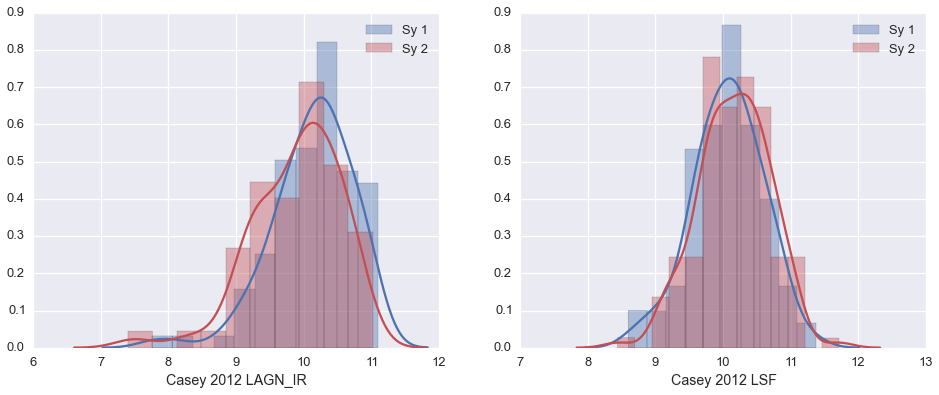

In [24]:
fig = plt.figure(figsize=(8, 6))
#ax1 = fig.add_subplot(121)
#sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1') & np.isfinite(bat_casey['LAGN_IR']), 'LAGN_IR'], color='b', ax=ax1)
#sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2') & np.isfinite(bat_casey['LAGN_IR']), 'LAGN_IR'], color='r', ax=ax1)
#ax1.legend(['Sy 1', 'Sy 2'])
#ax1.set_xlabel('Casey 2012 LAGN_IR')

ax2 = fig.add_subplot(111)
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'LSF'], color='b', ax=ax2)
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'LSF'], color='r', ax=ax2)
ax2.legend(['Sy 1', 'Sy 2'])
ax2.set_xlabel('log LFIR [L$_{sun}$]')

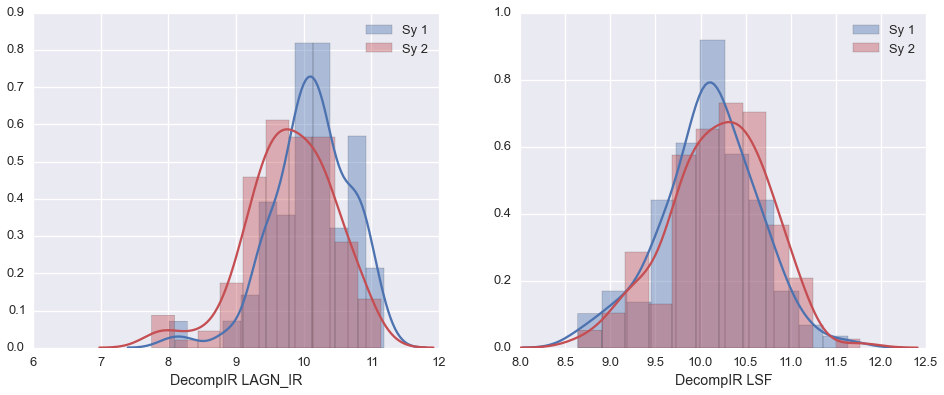

In [28]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1') & (bat_decompir['LAGN_IR'] > 5.0), 'LAGN_IR'], color='b', ax=ax1)
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2') & (bat_decompir['LAGN_IR'] > 5.0), 'LAGN_IR'], color='r', ax=ax1)
ax1.legend(['Sy 1', 'Sy 2'])
ax1.set_xlabel('DecompIR LAGN_IR')

ax2 = fig.add_subplot(122)
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'LSF'], color='b', ax=ax2)
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'LSF'], color='r', ax=ax2)
ax2.legend(['Sy 1', 'Sy 2'])
ax2.set_xlabel('DecompIR LSF')

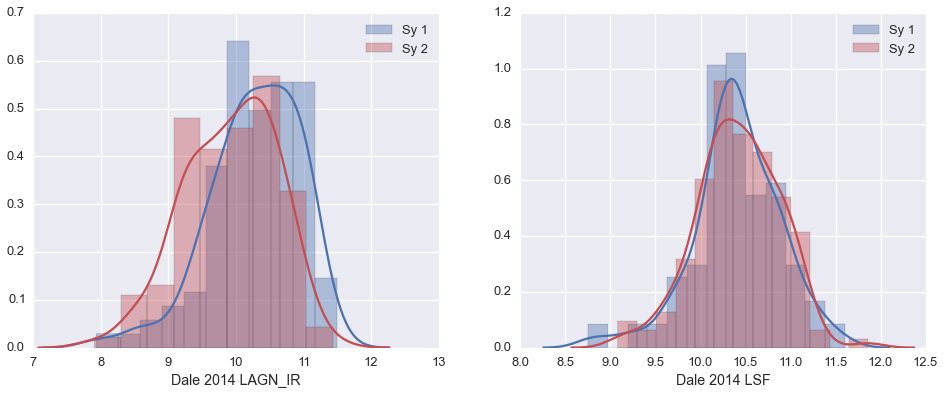

In [32]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1') & (bat_dale14['LAGN_IR'] > 5.0), 'LAGN_IR'], color='b', ax=ax1)
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2') & (bat_dale14['LAGN_IR'] > 5.0), 'LAGN_IR'], color='r', ax=ax1)
ax1.legend(['Sy 1', 'Sy 2'])
ax1.set_xlabel('Dale 2014 LAGN_IR')

ax2 = fig.add_subplot(122)
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'LSF'], color='b', ax=ax2)
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'LSF'], color='r', ax=ax2)
ax2.legend(['Sy 1', 'Sy 2'])
ax2.set_xlabel('Dale 2014 LSF')

In all 3 models there is a clear indication that Sy 1's display a higher IR AGN luminosity than Sy 2's. But we know that Sy 1's have a higher X-ray luminosity than Sy 2's so since the two are quite well correlated we need to see if the ratio between the two is the same or different as well.

Also it looks like the Casey and DecompIR models indicate that Sy 1's have a slightly lower star-forming luminosity than Sy 2's. However for the Dale 2014 model, they look to be essentially the same. For all 3 models though the differences are quite small so I doubt we'll be able to say anything definitive besides they seem to be the same. One thing we haven't included however though are the sources that didn't have enough data to be fit with the models. Since there is a difference in the detection fraction between Sy 1's and Sy 2's. 

Let's run a K-S test on these different components for each model.

In [39]:
ks_sy_lagnIR_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1') & np.isfinite(bat_casey['LAGN_IR']), 'LAGN_IR'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2') & np.isfinite(bat_casey['LAGN_IR']), 'LAGN_IR'])
ks_sy_lagnIR_decompir = ks_2samp(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1') & (bat_decompir['LAGN_IR'] > 5.0), 'LAGN_IR'], bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2') & (bat_decompir['LAGN_IR'] > 5.0), 'LAGN_IR'])
ks_sy_lagnIR_dale14 = ks_2samp(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'LAGN_IR'], bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'LAGN_IR'])

print 'Casey LAGN IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lagnIR_casey[1]
print ''
print 'DecompIR LAGN IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lagnIR_decompir[1]
print ''
print 'Dale14 LAGN IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lagnIR_dale14[1]

Casey LAGN IR Seyfert Comparison:
K-S Probability:  0.0273329807344

DecompIR LAGN IR Seyfert Comparison:
K-S Probability:  0.000459278298846

Dale14 LAGN IR Seyfert Comparison:
K-S Probability:  4.69185038662e-07


In [110]:
ks_sy_lsf_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1') & np.isfinite(bat_casey['LSF']), 'LSF'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2') & np.isfinite(bat_casey['LSF']), 'LSF'])
ks_sy_lsf_decompir = ks_2samp(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1') & (bat_decompir['LSF'] > 5.0), 'LSF'], bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2') & (bat_decompir['LSF'] > 5.0), 'LSF'])
ks_sy_lsf_dale14 = ks_2samp(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'LSF'], bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'LSF'])

print 'Casey LSF IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lsf_casey[1]
print ''
print 'DecompIR LSF IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lsf_decompir[1]
print ''
print 'Dale14 LSF IR Seyfert Comparison:'
print 'K-S Probability: ', ks_sy_lsf_dale14[1]

Casey LSF IR Seyfert Comparison:
K-S Probability:  0.311950642517

DecompIR LSF IR Seyfert Comparison:
K-S Probability:  0.0732652396385

Dale14 LSF IR Seyfert Comparison:
K-S Probability:  0.473574082532


So with the K-S test, it's fairly clear that Sy 1's have a different distribution than Sy 2's and based on the histograms, Sy 1's have a higher IR AGN-associated luminosity. 

Also based on the K-S test we can confirm that Sy 1's and Sy 2's have essentially the same star-forming luminosity indicating that Sy 1's and Sy 2's are associated with host galaxies that have the same SFRs. Sy 2's DO NOT occur in galaxies with higher SFR.

Given this, it seems that Sy 1's instead occur in galaxies with a higher AGN fraction that is strictly driven by the higher AGN-associated IR luminosity. Let's plot the AGN fractions for each model separated by Seyfert Type.

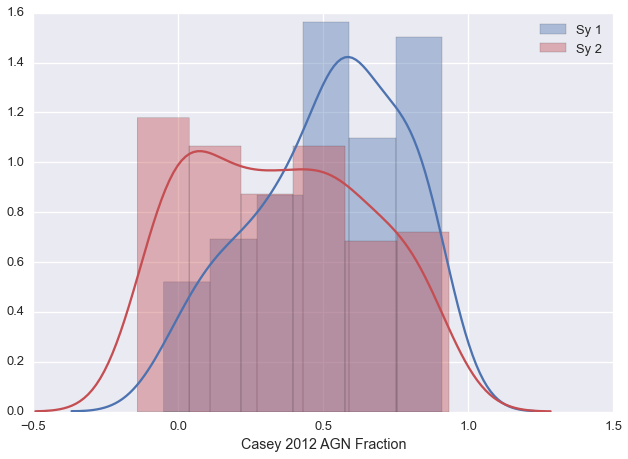

In [43]:
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'agn_frac'], color='b')
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'agn_frac'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Casey 2012 AGN Fraction')

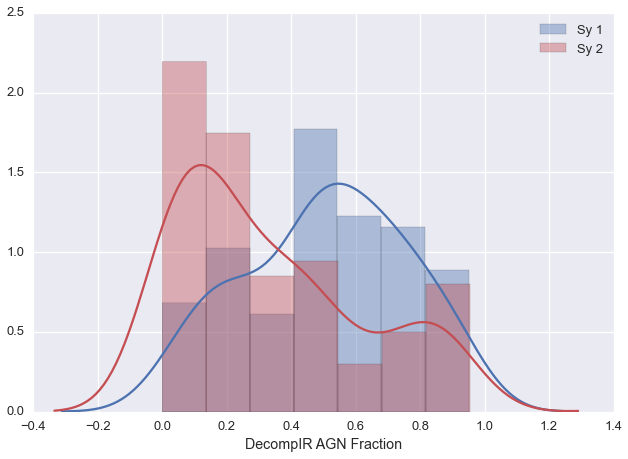

In [45]:
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'agn_frac'], color='b')
sn.distplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'agn_frac'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('DecompIR AGN Fraction')

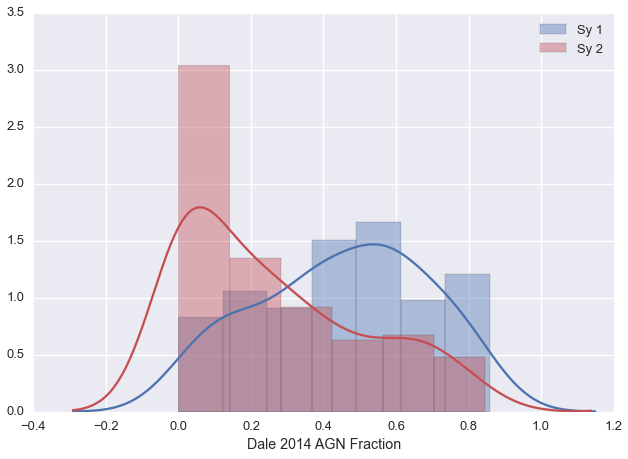

In [47]:
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'agn_frac'], color='b')
sn.distplot(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'agn_frac'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Dale 2014 AGN Fraction')

Yup very clear that ALL 3 models show that Sy 1's have an AGN fraction distribution that peaks at much higher levels than Sy 2's. I don't think we need to even do a K-S test to confirm this.

Let's look at the ratio of the IR AGN luminosity to the X-ray luminosity. 

In [48]:
bat_flux = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_bat_flux.csv', index_col=0)

bat_casey['LBAT'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux'])
bat_decompir['LBAT'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux'])
bat_dale14['LBAT'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux'])

In [56]:
# Calculate the IR-to-Xray ratio. Need to convert the IR AGN luminosity to cgs units
bat_casey['IR/X-ray Ratio'] = 10**bat_casey['LAGN_IR']*3.846e33/10**bat_casey['LBAT']
bat_decompir['IR/X-ray Ratio'] = 10**bat_decompir['LAGN_IR']*3.846e33/10**bat_decompir['LBAT']
bat_dale14['IR/X-ray Ratio'] = 10**bat_dale14['LAGN_IR']*3.846e33/10**bat_dale14['LBAT']

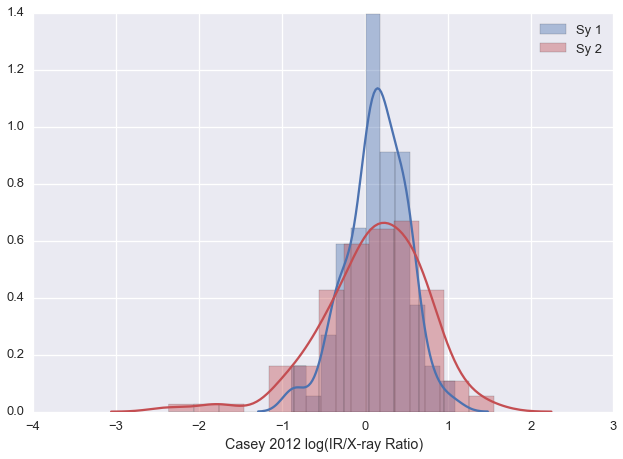

In [54]:
sn.distplot(np.log10(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1') & np.isfinite(bat_casey['LAGN_IR']), 'IR/X-ray Ratio']), color='b')
sn.distplot(np.log10(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2') & np.isfinite(bat_casey['LAGN_IR']), 'IR/X-ray Ratio']), color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Casey 2012 log(IR/X-ray Ratio)')

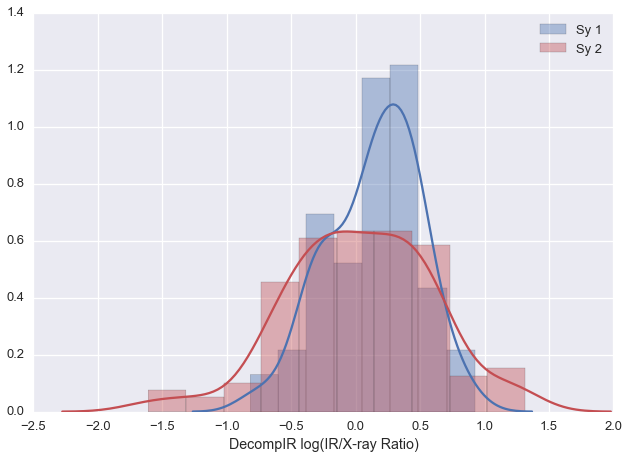

In [59]:
sn.distplot(np.log10(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1') & (bat_decompir['LAGN_IR'] > 5.0), 'IR/X-ray Ratio']), color='b')
sn.distplot(np.log10(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2') & (bat_decompir['LAGN_IR'] > 5.0), 'IR/X-ray Ratio']), color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('DecompIR log(IR/X-ray Ratio)')

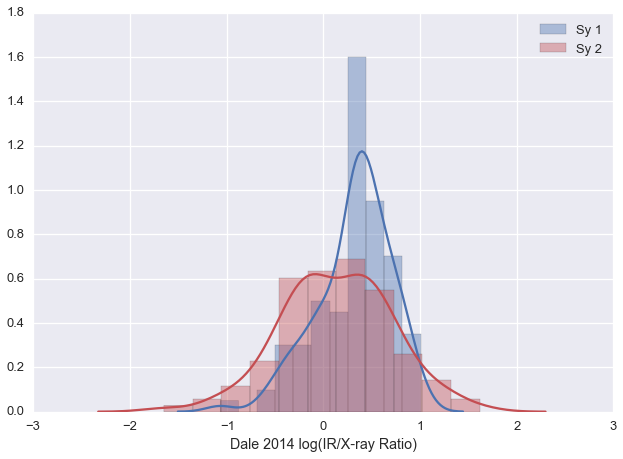

In [61]:
sn.distplot(np.log10(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1') & (bat_dale14['LAGN_IR'] > 5.0), 'IR/X-ray Ratio']), color='b')
sn.distplot(np.log10(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2') & (bat_dale14['LAGN_IR'] > 5.0), 'IR/X-ray Ratio']), color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Dale 2014 log(IR/X-ray Ratio)')

Hmmm pretty interesting. For all 3 models it looks like the Sy 1's are fairly narrowly peaked around a single value of the IR/X-ray ratio of about 2.0 meaning there is more energy being emitted in the IR than X-ray. 

For Sy 2's its unclear what might be going on. Their distribution is quite broad compared to Sy 1's and extends to both higher and lower values. But it depends on the model we are using whether Sy 2's on average have a higher or lower IR/X-ray ratio than Sy 1's. For the Casey 2012 model they look to have about the same average ratio. However for DecompIR and especially Dale et al 2014, Sy 2's look to have a lower ratio. I have a feeling this has to do with those sources where the AGN fraction greatly varies between the Casey model and the other ones.

Another thing we can look at with the Casey model are differences in the dust temperature and dust mass.

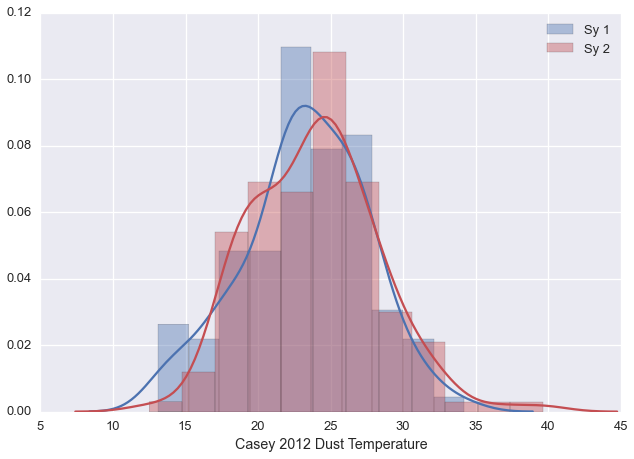

In [69]:
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'tdust'], color='b')
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'tdust'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Casey 2012 Dust Temperature')

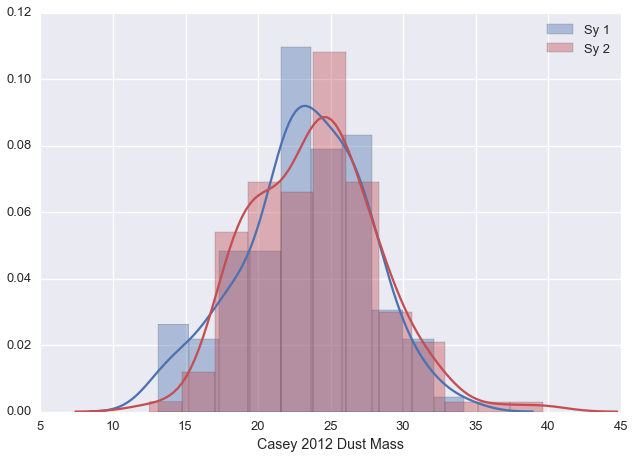

In [71]:
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'tdust'], color='b')
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'tdust'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel('Casey 2012 Dust Mass')

Looks like the same distribution to me.

In [73]:
ks_sy_tdust_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'tdust'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'tdust'])
ks_sy_mdust_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'mdust'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'mdust'])

print 'Casey Dust Property Comparison:'
print 'Tdust K-S Probability: ', ks_sy_tdust_casey[1]
print 'Tdust K-S Probability: ', ks_sy_mdust_casey[1]

Casey Dust Property Comparison:
Tdust K-S Probability:  0.518694354958
Tdust K-S Probability:  0.812060995456


Yup very definitive that Sy 1s and Sy 2s live in host galaxies with the same distribution of dust temperature and dust mass. If we assume that dust mass follows gas mass as well as stellar mass, then that means that Sy 1 and Sy 2 galaxies have the same gas fraction.

One other thing we can look at is the distribution of alpha, the slope of the MIR powerlaw.

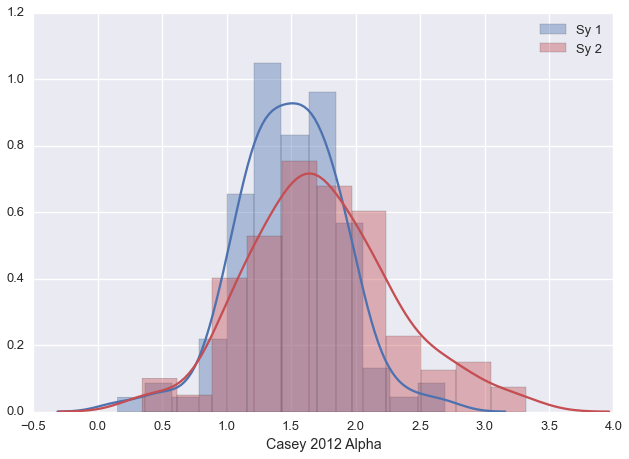

In [78]:
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'alpha'], color='b')
sn.distplot(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'alpha'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel(r'Casey 2012 Alpha')

Here it looks like there is a difference with Sy 1's showing much more galaxies with a lower value of alpha and narrowly distributed around 1.5. Again I wonder if this is due to the starbursts in the sample. These sources have a high value of alpha (i.e. very steep MIR SED). I think these are most likely to be Sy 2's 

In [81]:
ks_sy_alpha_casey = ks_2samp(bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'alpha'], bat_casey.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'alpha'])
print 'Casey Alpha Comparison:'
print 'Alpha K-S Probability: ', ks_sy_alpha_casey[1]

Casey Alpha Comparison:
Alpha K-S Probability:  0.00110746029448


K-S confirms this.

One other thing we can look at with the Dale 2014 model is it's own distribution of alpha which is indicative of the hardness of the interstellar radiation field.

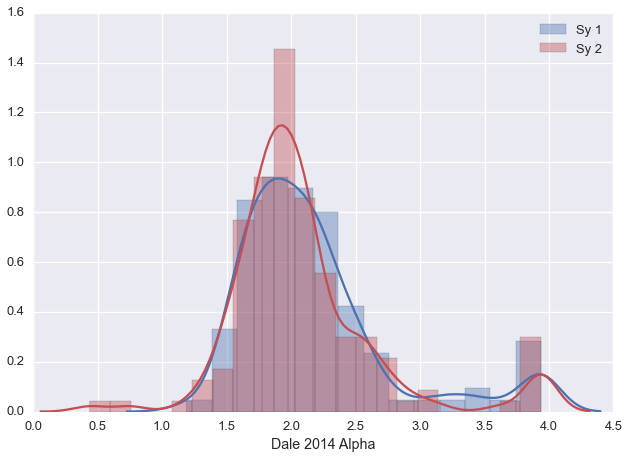

In [83]:
sn.distplot(bat_dale14.loc[(bat_casey['Sy_Type'] == 'Sy 1'), 'alpha'], color='b')
sn.distplot(bat_dale14.loc[(bat_casey['Sy_Type'] == 'Sy 2'), 'alpha'], color='r')
plt.legend(['Sy 1', 'Sy 2'])
plt.xlabel(r'Dale 2014 Alpha')

For this model, there is absolutely no difference between Sy 1's and Sy 2's. In other words, the hardness of the ISRF is not any different in Sy 1's and Sy 2's. 

In [86]:
ks_sy_alpha_dale = ks_2samp(bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 1'), 'alpha'], bat_dale14.loc[(bat_dale14['Sy_Type'] == 'Sy 2'), 'alpha'])
print 'Dale Alpha Comparison:'
print 'Alpha K-S Probability: ', ks_sy_alpha_dale[1]

Dale Alpha Comparison:
Alpha K-S Probability:  0.468937388609


K-S test confirms this.

For the DecompIR model, really the only thing we can look at is the distribution of which host models were used for Sy 1's and Sy 2's.

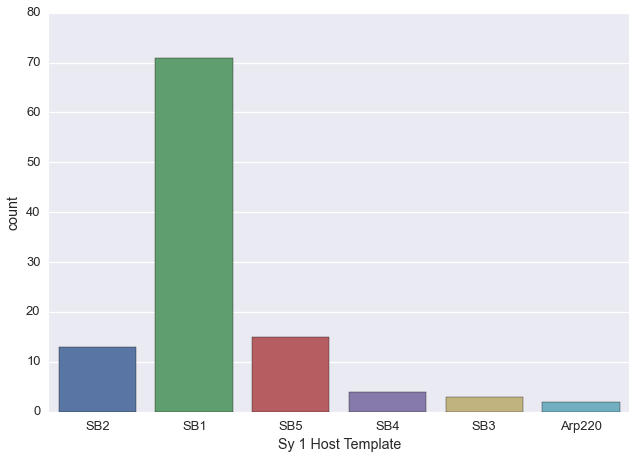

In [91]:
sn.countplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'host_name'])
plt.xlabel('Sy 1 Host Template')

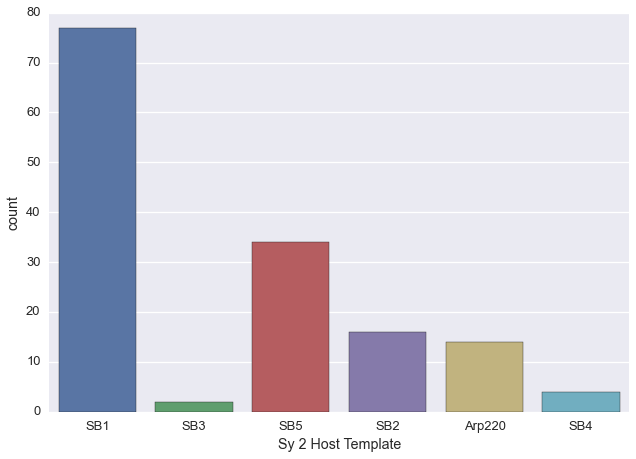

In [94]:
sn.countplot(bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'host_name'])
plt.xlabel('Sy 2 Host Template')

There is definitely a higher fraction of sources that are Sy 2's and have an SB5, SB2, and Arp220 host template. This would indicate that Sy 2's are more likely to be associated with a 'starburst' but it doesn't seem to come out in the star-forming luminosity distribution. So either the numbers are too low to make any difference OR the actual luminosity of these sources aren't as high as what's expected for a starburst. We can actually test this.

(8, 12)

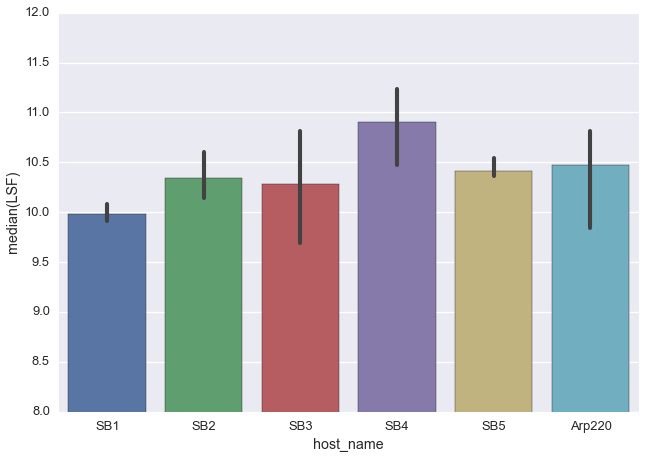

In [104]:
sn.barplot(x=bat_decompir['host_name'], y=bat_decompir['LSF'], estimator=np.median, order=['SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'Arp220'])
plt.ylim(8, 12)

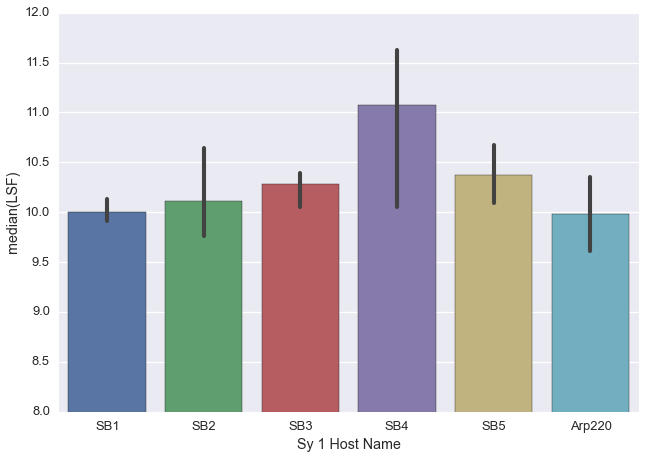

In [107]:
sn.barplot(x=bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'host_name'], y=bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 1'), 'LSF'], estimator=np.median,
           order=['SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'Arp220'])
plt.ylim(8, 12)
plt.xlabel('Sy 1 Host Name')

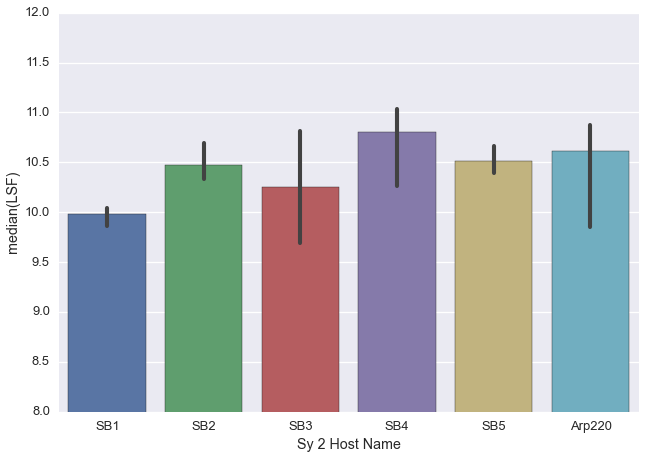

In [109]:
sn.barplot(x=bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'host_name'], y=bat_decompir.loc[(bat_decompir['Sy_Type'] == 'Sy 2'), 'LSF'], estimator=np.median,
           order=['SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'Arp220'])
plt.ylim(8, 12)
plt.xlabel('Sy 2 Host Name')

It's pretty clear that the sources that have the 'SB4' host galaxy shape have the highest luminosity but it's not a big difference between the other SEDs besides the 'SB1' template which has the lowest median luminosity. 

But none of the templates average out to IR luminosities greater than about $10^{10.75}\,L_{\odot}$ which is lower than the luminosity for a LIRG and especially a ULIRG. So none of these galaxies would be classified as a standard starburst galaxy given their IR luminosity.